<a href="https://colab.research.google.com/github/1Henri1/AdotaPets2/blob/master/projetoCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Henrique Silva Barbosa

Ra: 11202421497

Nome: Julio Cesar Stabile

Ra: 11202420893

# ***Pokégrafo - Uma análise de tipos***

# Descrição do projeto

O projeto trata de uma análise interativa entre Pokémons da 5ª geração acerca dos tipos de cada um e suas combinações. Colocando-os em um grafo, a visualização dessas interações fica mais clara.

Explicando melhor, em Pokémon, um dos status presentes é o tipo atribuido a cada Pokémon individualmente. Cada tipo possui suas vantagens ofensivamente e defensivamente, sendo capaz de dar mais dano ao oponente ou de resistir melhor aos ataques recebidos.

Ao todo, na 5ª geração, existiam 17 tipos presentes, considerando que cada tipo poderia ser misturado com um outro qualquer (que não fosse o mesmo) e que a ordem nãu mudava a dinâmica da batalha (ou seja, um pokémon água/fogo é idêntico a um fogo/água) as possibilidades eram muitas, aproximando (17*16)/2 (136 combinações possíveis).

Utilizando das propriedades do grafo, iremos identificar quais seriam os melhores pokémons pra formar um time que seja o melhor para combate na 5ªgeração, considerando 3 tipos como defensivos e 3 tipos como atacantes (desconsideraremos pokémons suporte pois isso considera sua movepool seus outros status como defesa, defesa especial e HP)

# coleta e preparação de dados

# modelagem

In [ ]:
#variavel com nome e tipos dos pokemons
pokemons = """victini,psychic,fire
serperior,grass
emboar,fire,fighting
samurott,water
watchog,normal
stoutland,normal
liepard,dark
simisage,grass
simisear,fire
simipour,water
musharna,psychic
unfezant,normal,flying
zebstrika,electric
gigalith,rock
swoobat,psychic,flying
excadrill,ground,steel
audino,normal
conkeldurr,fighting
seismitoad,water,ground
sawk,fighting
leavanny,bug,grass
scolipede,bug,poison
whimsicott,grass,fairy
lilligant,grass
basculin-red-striped,water
krookodile,ground,dark
darmanitan-standard,fire
maractus,grass
crustle,bug,rock
scrafty,dark,fighting
sigilyph,psychic,flying
cofagrigus,ghost
carracosta,water,rock
archeops,rock,flying
garbodor,poison
zoroark,dark
cinccino,normal
gothitelle,psychic
reuniclus,psychic
swanna,water,flying
vanilluxe,ice
sawsbuck,normal,grass
emolga,electric,flying
escavalier,bug,steel
amoonguss,grass,poison
jellicent,water,ghost
alomomola,water
galvantula,bug,electric
ferrothorn,grass,steel
klinklang,steel
eelektross,electric"""

#criação da matriz com nome e tipo dos pokemons
matriz = pokemons.split("\n")
poketriz=[]
for i in range(len(matriz)):
  poketriz.append(matriz[i].split(","))

#criação do dataset num estilo parecido com csv
dataset="no1,no2,peso\n"
for i in range(len(poketriz)): #le os pokemons atacantes
  for k in range(len(poketriz)): #le os pokemons defensores
    vetor=0
    for j in range(len(poketriz[i])-1): #le os tipos dos pokemons atacantes
      mult=1
      for l in range(len(poketriz[k])-1): #le os tipos dos pokemons defensores
          #analise dos tipos dos pokemons atacante e defensor para criar o multiplicador de dano
          if poketriz[i][j+1] == 'fire':
            if poketriz[k][l+1] in ('steel','ice','bug','grass'):
              mult*=2
            elif poketriz[k][l+1] in ('dragon','water','fire','rock'):
              mult*=0.5
          elif poketriz[i][j+1] == 'water':
            if poketriz[k][l+1] in ('fire','rock','ground'):
              mult*=2
            elif poketriz[k][l+1] in ('dragon','water','grass'):
              mult*=0.5
          elif poketriz[i][j+1] == 'grass':
            if poketriz[k][l+1] in ('water','ground','rock'):
              mult*=2
            elif poketriz[k][l+1] in ('dragon','fire','grass','flying','steel','bug','poison'):
              mult*=0.5
          elif poketriz[i][j+1] == 'electric':
            if poketriz[k][l+1] in ('water','flying'):
              mult*=2
            elif poketriz[k][l+1] in ('grass','electric','dragon'):
              mult*=0.5
            elif poketriz[k][l+1] in ('ground'):
              mult*=0
          elif poketriz[i][j+1] == 'psychic':
            if poketriz[k][l+1] in ('poison','fighting'):
              mult*=2
            elif poketriz[k][l+1] in ('psychic','steel'):
              mult*=0.5
            elif poketriz[i][j+1] in ('dark'):
              mult*=0
          elif poketriz[i][j+1] == 'ice':
            if poketriz[k][l+1] in ('dragon','flying','grass','ground'):
              mult*=2
            elif poketriz[k][l+1] in ('fire','water','ice','steel'):
              mult*=0.5
          elif poketriz[i][j+1] == 'dragon':
            if poketriz[k][l+1] in ('dragon'):
              mult*=2
            elif poketriz[k][l+1] in ('steel'):
              mult*=0.5
          elif poketriz[i][j+1] == 'dark':
            if poketriz[k][l+1] in ('psychic','ghost'):
              mult*=2
            elif poketriz[k][l+1] in ('fighting','dark'):
              mult*=0.5
          elif poketriz[i][j+1] == 'steel':
            if poketriz[k][l+1] in ('rock','ice'):
              mult*=2
            elif poketriz[k][l+1] in ('fire','water','electric','steel'):
              mult*=0.5
          elif poketriz[i][j+1] == 'ghost':
            if poketriz[k][l+1] in ('ghost','psychic'):
              mult*=2
            elif poketriz[k][l+1] in ('dark'):
              mult*=0.5
            elif poketriz[i][j] in ('normal'):
              mult*=0
          elif poketriz[i][j+1] == 'bug':
            if poketriz[k][l+1] in ('grass','psychic','dark'):
              mult*=2
            elif poketriz[k][l+1] in ('fighting','flying','poison','ghost','steel','fire'):
              mult*=0.5
          elif poketriz[i][j+1] == 'rock':
            if poketriz[k][l+1] in ('flying','ice','bug','fire'):
              mult*=2
            elif poketriz[k][l+1] in ('fighting','ground','steel'):
              mult*=0.5
          elif poketriz[i][j+1] == 'ground':
            if poketriz[k][l+1] in ('electric','rock','steel','poison','fire'):
              mult*=2
            elif poketriz[k][l+1] in ('bug','grass'):
              mult*=0.5
            elif poketriz[i][j+1] in ('flying'):
              mult*=0
          elif poketriz[i][j+1] == 'poison':
            if poketriz[k][l+1] in ('grass'):
              mult*=2
            elif poketriz[k][l+1] in ('ground','poison','rock','ghost'):
              mult*=0.5
            elif poketriz[i][j+1] in ('steel'):
              mult*=0
          elif poketriz[i][j+1] == 'flying':
            if poketriz[k][l+1] in ('grass','bug','fighting'):
              mult*=2
            elif poketriz[k][l+1] in ('electric','rock','steel'):
              mult*=0.5
          elif poketriz[i][j+1] == 'fighting':
            if poketriz[k][l+1] in ('normal','ice','rock','dark','steel'):
              mult*=2
            elif poketriz[k][l+1] in ('flying','bug','psychic','poison'):
              mult*=0.5
            elif poketriz[i][j+1] in ('ghost'):
              mult*=0
          elif poketriz[i][j+1] == 'normal':
            if poketriz[k][l+1] in ('rock','steel'):
              mult*=0.5
            elif poketriz[k][l+1] in ('ghost'):
              mult*=0
      vetor = mult if mult>vetor else vetor #salva o maior multiplicador de dano que um pokemon pode dar no outro

    #adiciona uma ligação entre os pokemons caso o multiplicador de dano seja maior que 1, com o peso sendo o multiplicador
    if vetor>1:
      dataset+=f"{poketriz[i][0]},{poketriz[k][0]},{vetor}\n"

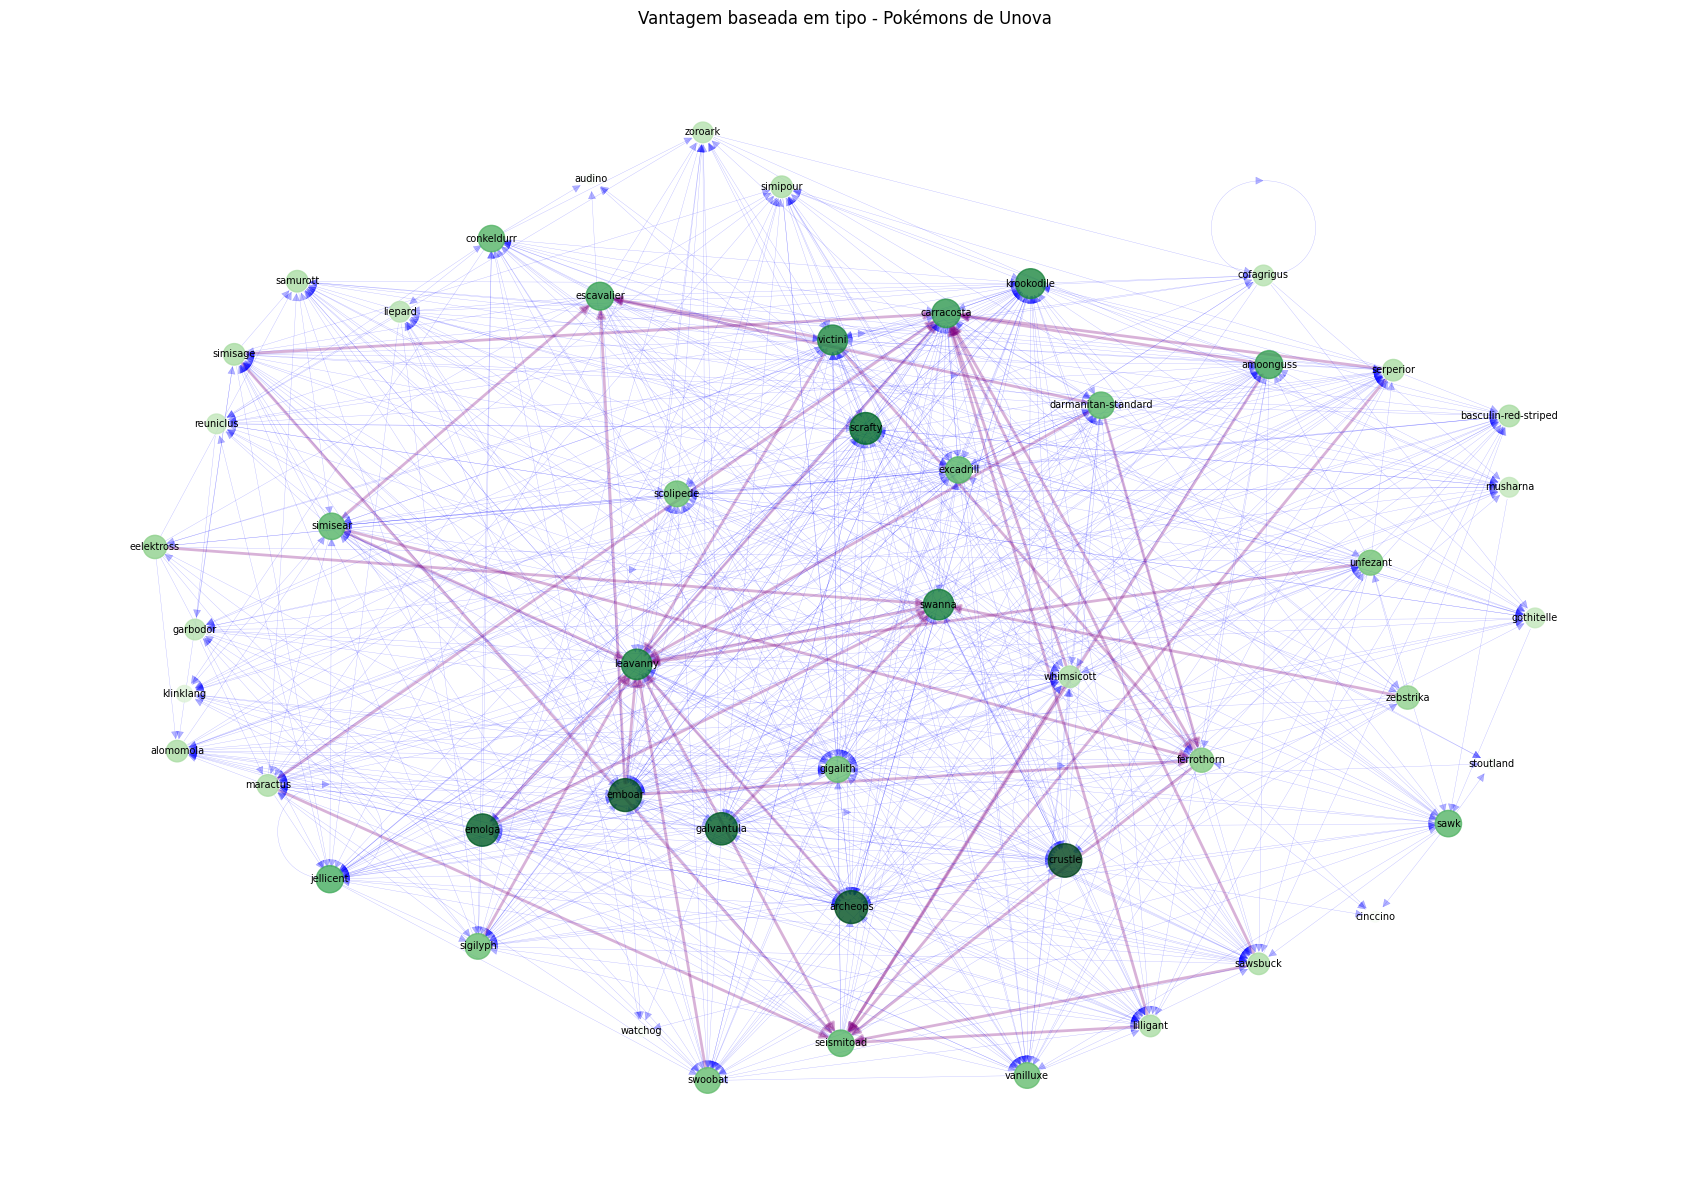

Número de vértices: 51
Número de arestas: 651
Máximo de pokemons que um da super efetivo: 26
Máximo de pokemons que dão super efetivo em um: 26
Média de superefetividade entre os pokemons (recebem e dão super efetivo): 12.76
Densidade:  0.26


In [ ]:
import pandas as pd
import networkx as nx
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

def print_info_grafo(G):
    print('Número de vértices:', G.number_of_nodes())
    print('Número de arestas:', G.number_of_edges())
    in_degrees = [deg for node, deg in G.in_degree()]
    out_degrees = [deg for node, deg in G.out_degree()]
    print('Máximo de pokemons que um da super efetivo:', max(in_degrees))
    print('Máximo de pokemons que dão super efetivo em um:', max(out_degrees))
    print('Média de superefetividade entre os pokemons (recebem e dão super efetivo):', "{:.2f}".format(sum(in_degrees) / G.number_of_nodes()))
    print('Densidade: ', "{:.2f}".format( nx.density(G)) )

df = pd.read_csv(StringIO(dataset)) # Converte a string para um DataFrame
G = nx.DiGraph()
for _, row in df.iterrows(): # Adiciona as arestas com peso
    G.add_edge(row['no1'], row['no2'], weight=row['peso'])

pos = nx.spring_layout(G, seed=42, k=3, scale=10) #estilo da vizualização
factor = 3
for n in pos:
    pos[n] = (pos[n][0] * factor, pos[n][1] * factor)

#tamanho e cor dos vertices com base no numero de arestas saindo
out_degrees = dict(G.out_degree())
node_sizes = [60 + out_degrees[node] * 20 for node in G.nodes()]
norm = colors.Normalize(vmin=min(out_degrees.values()), vmax=max(out_degrees.values()))
cmap = cm.Greens
node_colors = [cmap(norm(out_degrees[node])) for node in G.nodes()]

#cor e tamanho das arestas com base no peso das arestas
weights = [d['weight']**3/32 for s, t, d in G.edges(data=True)]
peso_cores = {0.25: 'blue', 2: 'purple'}
colors = [peso_cores.get(p) for p in weights]

# Desenha o grafo
plt.figure(figsize=(17, 12))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3, arrows=True, arrowstyle='-|>', arrowsize=13, width=weights, edge_color=colors)
nx.draw_networkx_labels(G, pos, font_size=7) #tamanho dos nós

plt.title("Vantagem baseada em tipo - Pokémons de Unova", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()
print_info_grafo(G)

In [ ]:

def grau_saindo(valor):
  degree_sequence = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)
  if valor=="inicio":
    print("pokemon(s) que tem vantagem contra o maior numero de outros")
    i=0
    while degree_sequence[i][1] == degree_sequence[0][1]:
      print(degree_sequence[i][0],end=", ") # vertices com maior grau
      i+=1
    print(f"\nnúmero de pokemons que causa super efetivo: {degree_sequence[0][1]}") # valor do maior grau
  else:
    print("pokemon(s) que tem vantagem contra o menor numero de outros")
    fim = len(degree_sequence)-1
    i = fim
    while degree_sequence[i][1] == degree_sequence[fim][1]:
      print(degree_sequence[i][0],end=", ") # vertices com menor grau
      i-=1
    print(f"\nnúmero de pokemons que causa super efetivo: {degree_sequence[fim][1]}") # valor do menor grau

def grau_entrando(valor):
  degree_sequence = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
  if valor=="inicio":
    print("pokemon(s) que tem desvantagem contra o maior numero de outros")
    i=0
    while degree_sequence[i][1] == degree_sequence[0][1]:
      print(degree_sequence[i][0],end=", ") # vertices com maior grau
      i+=1
    print(f"\nnúmero de pokemons que recebe super efetivo: {degree_sequence[0][1]}") # valor do maior grau
  else:
    print("pokemon(s) que tem desvantagem contra o menor numero de outros")
    fim = len(degree_sequence)-1
    i = fim
    while degree_sequence[i][1] == degree_sequence[fim][1]:
      print(degree_sequence[i][0],end=", ") # vertices com menor grau
      i-=1
    print(f"\nnúmero de pokemons que recebe super efetivo: {degree_sequence[fim][1]}") # valor do menor grau

grau_saindo('inicio')
grau_saindo('fim')
grau_entrando('inicio')
grau_entrando('fim')


pokemon(s) que tem vantagem contra o maior numero de outros
crustle, 
número de pokemons que causa super efetivo: 26
pokemon(s) que tem vantagem contra o menor numero de outros
cinccino, audino, stoutland, watchog, 
número de pokemons que causa super efetivo: 0
pokemon(s) que tem desvantagem contra o maior numero de outros
krookodile, 
número de pokemons que recebe super efetivo: 26
pokemon(s) que tem desvantagem contra o menor numero de outros
eelektross, zebstrika, 
número de pokemons que recebe super efetivo: 3


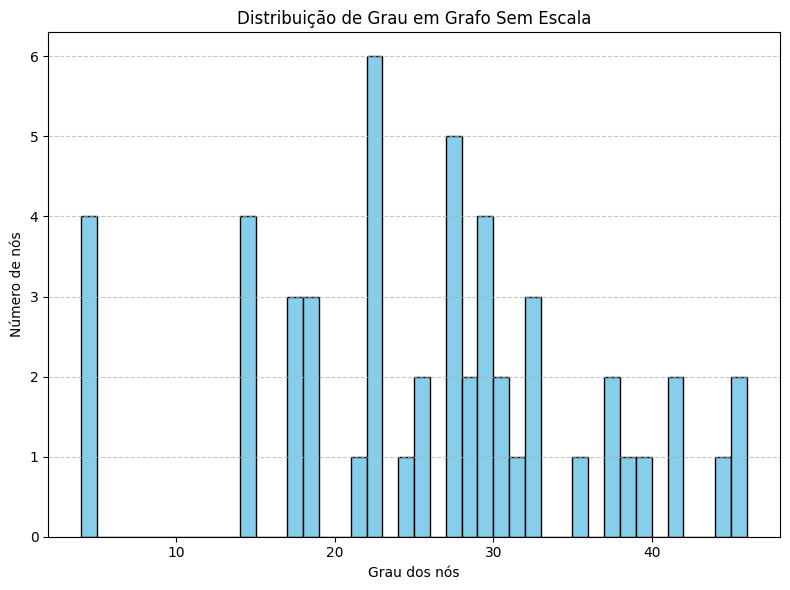

In [ ]:
degrees = [degree for _, degree in G.degree()]

plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees)+1), color='skyblue', edgecolor='black')
plt.title('Distribuição de Grau em Grafo Sem Escala')
plt.xlabel('Grau dos nós')
plt.ylabel('Número de nós')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

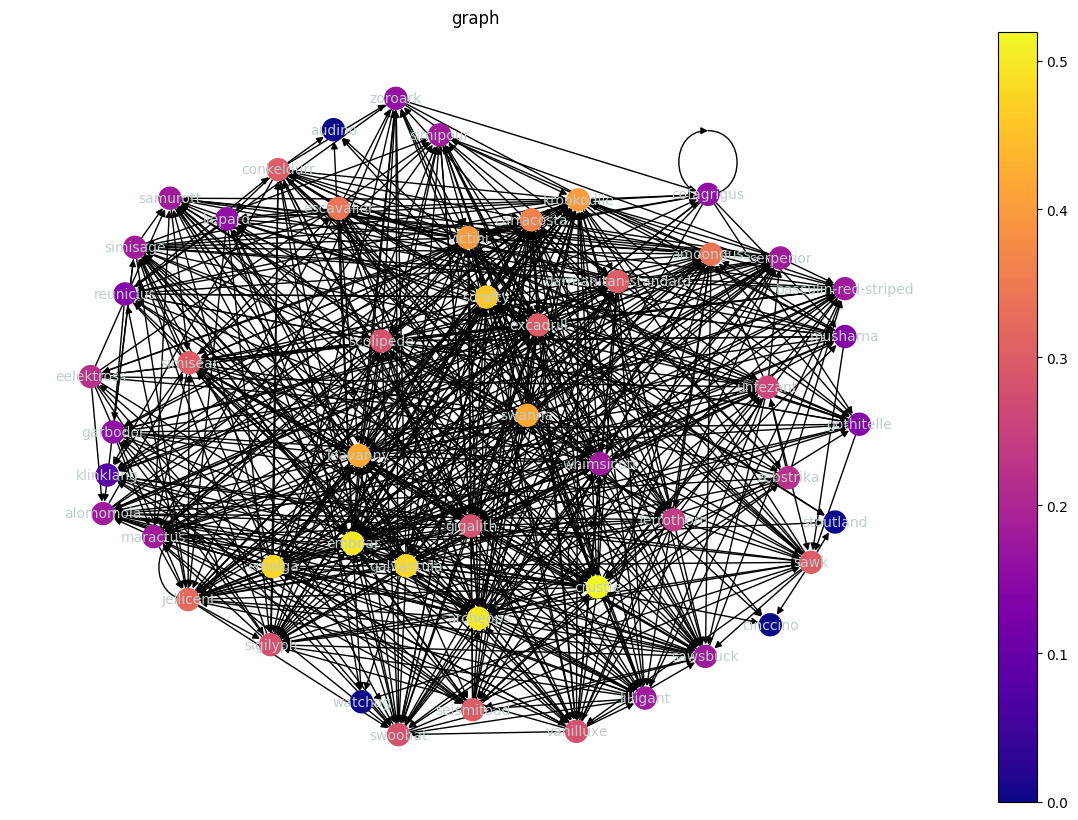

In [27]:
def draw(G, pos, measures, measure_name):
    plt.figure(figsize=(15, 10))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())

    labels = nx.draw_networkx_labels(G, pos, font_color='#C1CDCD', font_size=10)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

draw(G, pos, nx.out_degree_centrality(G), 'graph')

# Análise e resultados

Para a analise dos dados foi utilizado um grafo-direcionado para representar a relação de super efetividade entre os pokemons, para a vizualização do grafo foi adicionado cor e tamanho diferente para ataques que causam 2x e que causam 4x de dano.

Foi utilizada a analise do numero de nós e de arestas para definir a densidade de conexão do grafo que mostra o quão grande é a relação dos pokemons uns com os outros. Foi analisado os graus de entrada e saida dos nós para ver quais pokemons tem melhores caracteristicas especificas que citarei aqui.

Com a analise do grafo foi possivel aferir que o melhor pokemon para ataques é o Crustle tendo vantagem contra outros 26 pokemons, enquanto que os piores atacantes são Cinccino, Audino, Stoutland e Watchog que não tem vantagem contra ninguém. Em contrapartida os melhores defensores são Eelektross e Zebstrika que recebem super efetivo de somente 3 pokemons, enquanto que o Krookodile é o pior defensor sofrendo super efetivo de 26 pokemons

# contribuição por membro

# referencias